# ALL IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing 3 data set 
### 1) data for heart desease as "dataset"
### 2) data for Diabetes as "df"
### 3) data for Abbrivation as "short"

In [2]:
dataset = pd.read_csv("heart.csv", on_bad_lines='skip')
dataset=dataset.iloc[:,[1,7]]
short=pd.read_csv("Statecodes.csv")
df = pd.read_excel("diabetes222.xlsx", sheet_name="Diabetes")

# Bar garaph for Diabetic data
#### This will show us maximum minimum diabetic state


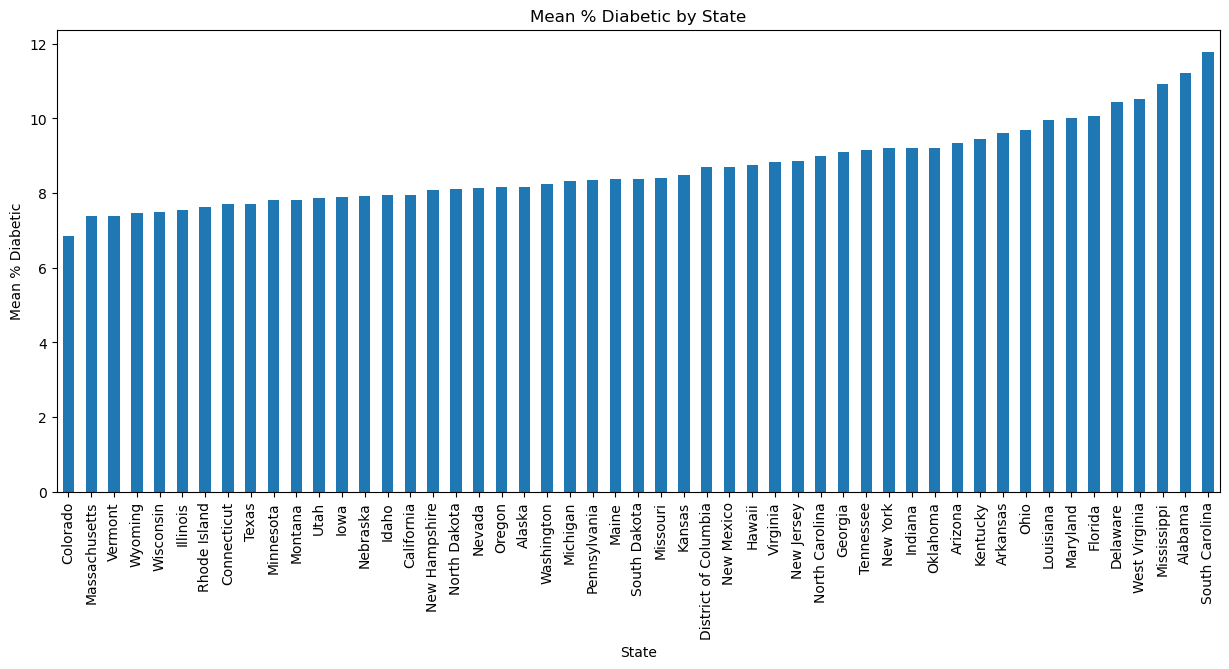

In [3]:
df.dropna(inplace=True)
df_state=df["STATE"]
df_DIABETIC=df["% DIABETIC"]
new_df = pd.DataFrame({'State':df_state, 'Diabetic':df_DIABETIC})
#new_df=new_df.sort_values(by='diabetic')
diabetics_mean=new_df.groupby('State').mean()

sorted_diabetics_mean = diabetics_mean.sort_values(by='Diabetic')


plt.figure(figsize=(15, 6))  # Set the figure size
sorted_diabetics_mean['Diabetic'].plot(kind='bar', rot=0)  # Create a bar plot
plt.xticks(rotation=90)
plt.xlabel('State')  # Set the x-axis label
plt.ylabel('Mean % Diabetic')  # Set the y-axis label
plt.title('Mean % Diabetic by State')  # Set the title of the plot
plt.show() 


# Bar graph for Heart Desease data
#### This will show us maximum and minimum heart desease state

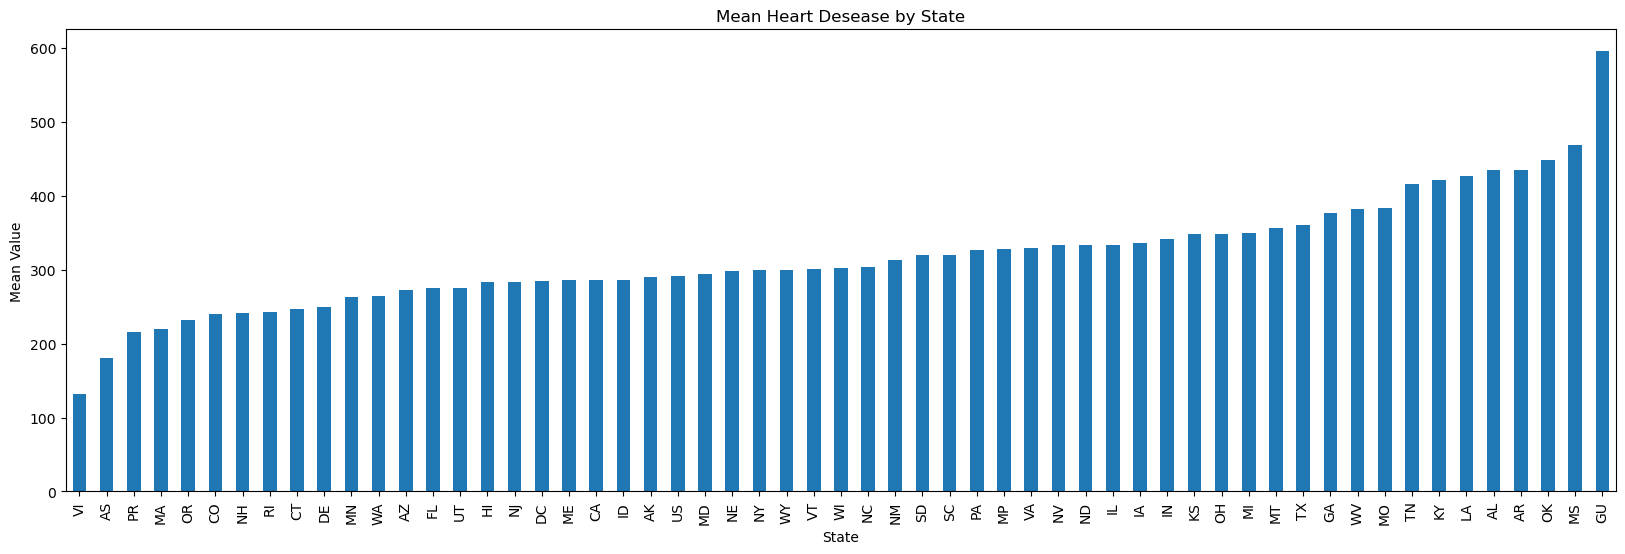

In [4]:
dataset.dropna(inplace=True)
dataset_state=dataset["LocationAbbr"]
dataset_value=dataset["Data_Value"]
new_dataset = pd.DataFrame({'State':dataset_state, 'Value':dataset_value})
#new_df=new_df.sort_values(by='diabetic')
value_mean=new_dataset.groupby('State').mean()

sorted_value_mean = value_mean.sort_values(by='Value')


plt.figure(figsize=(20, 6))  # Set the figure size
sorted_value_mean['Value'].plot(kind='bar', rot=0)  # Create a bar plot
plt.xticks(rotation=90)
plt.xlabel('State')  # Set the x-axis label
plt.ylabel('Mean Value')  # Set the y-axis label
plt.title('Mean Heart Desease by State')  # Set the title of the plot
plt.show() 

# Short Analysis
##### We can see that states with higher diebatic rate has higher heart desease rate also and vice versa. This indicates relation between diebatic and heart desease 

# Data Cleaning

### We are changing the short form of state into there complete name

In [5]:
for x in range(len(dataset["LocationAbbr"])):
    for y in range(len(short["Code"])):
        if dataset["LocationAbbr"].iloc[x] in short["Code"].iloc[y]:
            dataset["LocationAbbr"].iloc[x]= short["State"].iloc[y]
dataset

/var/folders/9g/4k7v0lpn3gzdf7n2fbc4pbn00000gn/T/ipykernel_41159/3983228706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["LocationAbbr"].iloc[x]= short["State"].iloc[y]


,LocationAbbr,Data_Value
0,Alaska,155.2
1,Alaska,174.2
2,Alaska,249.3
3,Alaska,349.8
5,Alaska,319.2
...,...,...
59086,Wyoming,279.1
59087,Wyoming,117.5
59091,Wyoming,319.5
59092,Wyoming,315.4


### Data reduction and Average calculation for heart desease data

In [6]:
# Assuming you already have a dataset DataFrame

# Create an empty list to store the individual DataFrames
result_dfs = []

# Iterate through unique values in 'LocationAbbr'
for location in dataset['LocationAbbr'].unique():
    # Filter the DataFrame for the current location
    location_data = dataset[dataset['LocationAbbr'] == location]
    
    # Calculate the average of 'Data_Value' for the current location
    avg_data_value = location_data['Data_Value'].mean()
    
    # Create a DataFrame for the current location and average
    location_df = pd.DataFrame({'LocationAbbr': [location], 'AverageDataValue': [avg_data_value]})
    
    # Append the DataFrame to the list
    result_dfs.append(location_df)

# Concatenate all the DataFrames in the list
result_df = pd.concat(result_dfs, ignore_index=True)

# Print the result_df
result_df=result_df.rename(columns={"LocationAbbr":"STATE"})


In [7]:
result_df['STATE'] = result_df['STATE'].str.lower()
result_df

,STATE,AverageDataValue
0,alaska,290.738793
1,alabama,435.169535
2,arkansas,435.567473
3,arizona,271.979401
4,as,180.533333
5,california,285.790990
6,colorado,240.040962
7,connecticut,247.168310
8,georgia,377.482417
9,dc,284.496774


### Data reduction and Average calculation for Diabetic data

In [8]:
result_dfs_df = []

# Iterate through unique values in 'LocationAbbr'
for location in df['STATE'].unique():
    # Filter the DataFrame for the current location
    location_data = df[df['STATE'] == location]
    
    # Calculate the average of 'Data_Value' for the current location
    avg_data_value = location_data['% DIABETIC'].mean()
    
    # Create a DataFrame for the current location and average
    location_df = pd.DataFrame({'STATE': [location], '% DIABETIC': [avg_data_value]})
    
    # Append the DataFrame to the list
    result_dfs_df.append(location_df)

# Concatenate all the DataFrames in the list
result_df_df = pd.concat(result_dfs_df, ignore_index=True)

# Print the result_df
result_df_df

,STATE,% DIABETIC
0,Alabama,11.208955
1,Alaska,8.151724
2,Arizona,9.333333
3,Arkansas,9.609333
4,California,7.953448
5,Colorado,6.845312
6,Connecticut,7.712500
7,Delaware,10.433333
8,District of Columbia,8.700000
9,Florida,10.073134


### Converting lower string to upper string

In [9]:
result_df_df['STATE'] = result_df_df['STATE'].str.lower()
result_df_df

,STATE,% DIABETIC
0,alabama,11.208955
1,alaska,8.151724
2,arizona,9.333333
3,arkansas,9.609333
4,california,7.953448
5,colorado,6.845312
6,connecticut,7.712500
7,delaware,10.433333
8,district of columbia,8.700000
9,florida,10.073134


### Dropping data and Creating new Dataset

In [10]:
result_df = result_df.merge(result_df_df, left_on="STATE", right_on="STATE", how='inner')

# Drop the duplicate column 'STATEW' (optional)
result_df = result_df.drop(columns='STATE')

# Print the updated result_df
print(result_df)

    AverageDataValue  % DIABETIC
0         290.738793    8.151724
1         435.169535   11.208955
2         435.567473    9.609333
3         271.979401    9.333333
4         285.790990    7.953448
5         240.040962    6.845312
6         247.168310    7.712500
7         377.482417    9.101887
8         249.410345   10.433333
9         274.846065   10.073134
10        282.962667    8.740000
11        336.432337    7.906061
12        334.004918    7.552941
13        427.436714    9.946875
14        285.896533    7.943182
15        341.919253    9.211957
16        347.796789    8.484762
17        421.414169    9.450833
18        285.711382    8.368750
19        220.161215    7.378571
20        294.703858   10.012500
21        350.115394    8.321687
22        383.286611    8.405217
23        263.494598    7.811494
24        469.039383   10.928049
25        357.135407    7.817857
26        303.563882    8.992000
27        333.693425    8.098113
28        297.956250    7.908602
29        

In [11]:
# Assuming 'result_df' contains your data with columns 'AverageDataValue' and '% DIABETIC'

# Extract the feature and target variable
X = result_df['% DIABETIC'].values.reshape(-1, 1)  # Feature (% DIABETIC)
y = result_df['AverageDataValue'].values  # Target variable (AverageDataValue)
X

array([[ 8.15172414],
       [11.20895522],
       [ 9.60933333],
       [ 9.33333333],
       [ 7.95344828],
       [ 6.8453125 ],
       [ 7.7125    ],
       [ 9.10188679],
       [10.43333333],
       [10.07313433],
       [ 8.74      ],
       [ 7.90606061],
       [ 7.55294118],
       [ 9.946875  ],
       [ 7.94318182],
       [ 9.21195652],
       [ 8.4847619 ],
       [ 9.45083333],
       [ 8.36875   ],
       [ 7.37857143],
       [10.0125    ],
       [ 8.32168675],
       [ 8.40521739],
       [ 7.81149425],
       [10.92804878],
       [ 7.81785714],
       [ 8.992     ],
       [ 8.09811321],
       [ 7.90860215],
       [ 8.08      ],
       [ 8.86190476],
       [ 8.71212121],
       [ 8.13529412],
       [ 9.2016129 ],
       [ 9.68295455],
       [ 9.21558442],
       [ 8.15      ],
       [11.78695652],
       [ 8.35074627],
       [ 7.64      ],
       [ 8.38181818],
       [ 7.87241379],
       [ 8.83458647],
       [ 9.16736842],
       [ 7.71456693],
       [ 7

### Static part for linear Regression

In [12]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the model's performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2723.6882269791868
R-squared: 0.3886278396570775
Coefficients: [23.63515007]
Intercept: 114.51754533082016


### Scatter Plot 

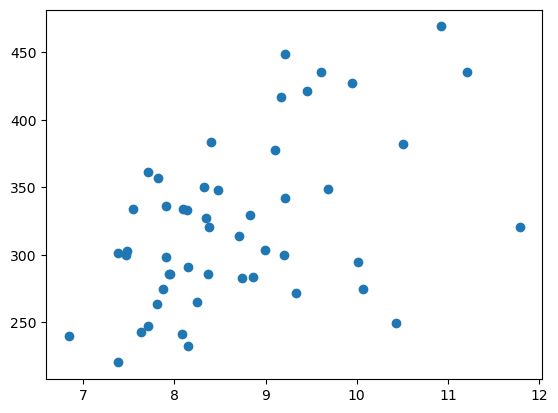

In [13]:
import matplotlib.pyplot as mp
x=result_df["% DIABETIC"].to_numpy()
y=result_df["AverageDataValue"].to_numpy()
mp.scatter(x,y)

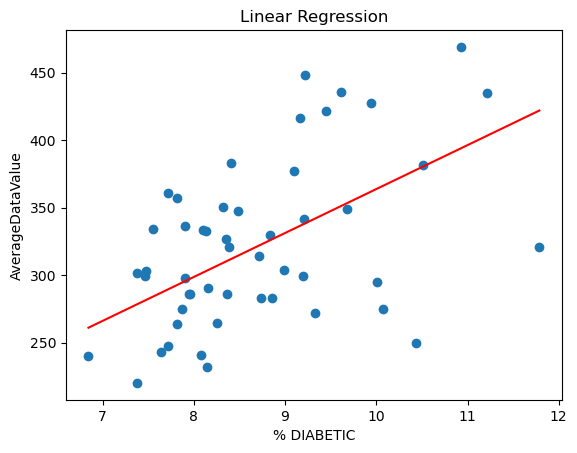

In [34]:
# Assuming 'result_df' contains your data with columns 'AverageDataValue' and '% DIABETIC'
x = result_df["% DIABETIC"].to_numpy()
y = result_df["AverageDataValue"].to_numpy()

plt.scatter(x, y)

# Initialize random values for m and c
m, c = np.random.random(), np.random.random()

def learn(x, y, m, c, epoch):
    for i in range(epoch):
        y_pred = m * x + c
        error = y - y_pred
        
        # Calculate gradients
        delta_m = (-2/len(x)) * np.sum(x * error)
        delta_c = (-2/len(x)) * np.sum(error)
        
        # Update m and c
        learning_rate = 0.01
        m -= learning_rate * delta_m
        c -= learning_rate * delta_c
    
    return m, c

# Call the learn function to update m and c
m, c = learn(x, y, m, c, 2000)

# Create points for the linear regression line
x1 = np.array([min(x), max(x)])
y1 = m * x1 + c

plt.plot(x1, y1, color='red')
plt.xlabel('% DIABETIC')
plt.ylabel('AverageDataValue')
plt.title('Linear Regression')
plt.show()


In [45]:
print(m,c)

32.55370593897995 38.216132623331305


In [50]:
def predict():
    y_pred=[(m*i + c) for i in range(len(x_test))]
    return y_pred
y_pred=predict()
y_pred

[38.216132623331305,
 70.76983856231126,
 103.32354450129121,
 135.87725044027115,
 168.4309563792511,
 200.98466231823107,
 233.538368257211,
 266.092074196191,
 298.6457801351709,
 331.19948607415085,
 363.75319201313084,
 396.3068979521108,
 428.8606038910907,
 461.4143098300707,
 493.9680157690506,
 526.5217217080306,
 559.0754276470105,
 591.6291335859905,
 624.1828395249704,
 656.7365454639504,
 689.2902514029304,
 721.8439573419103,
 754.3976632808902,
 786.9513692198702,
 819.5050751588501,
 852.0587810978301,
 884.6124870368101,
 917.1661929757901,
 949.7198989147699,
 982.2736048537499,
 1014.8273107927299,
 1047.3810167317097,
 1079.9347226706898,
 1112.4884286096697,
 1145.0421345486498,
 1177.5958404876296,
 1210.1495464266095,
 1242.7032523655896,
 1275.2569583045695,
 1307.8106642435494,
 1340.3643701825295,
 1372.9180761215093,
 1405.4717820604892,
 1438.0254879994693,
 1470.5791939384492,
 1503.132899877429,
 1535.6866058164092,
 1568.240311755389,
 1600.794017694369,


In [35]:
print(y1)

[261.05642281 421.92524915]


In [53]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
reg = LinearRegression()

x=x.reshape(-1,1)
y=y.reshape(-1,1)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.06, random_state=0)

In [31]:
#reg.fit(x_train,y_train)
#y_pred = reg.predict(x_test)
#print(y_pred)


[[299.64528776]
 [299.57313102]
 [323.24942377]]


# prediction model

In [54]:
prediction=pd.read_excel("cdc-diabetes-2018-2.xlsx", sheet_name="Diabetes")

In [55]:
prediction.head()

,YEAR,FIPS,COUNTY,STATEW,% DIABETIC
0,2018,1001,Autauga County,Alabama,9.5
1,2018,1003,Baldwin County,Alabama,8.4
2,2018,1005,Barbour County,Alabama,13.5
3,2018,1007,Bibb County,Alabama,10.2
4,2018,1009,Blount County,Alabama,10.5


In [56]:
prediction=prediction.iloc[:,[3,4]]

In [57]:
prediction=prediction.dropna()

In [58]:
pred= []

# Iterate through unique values in 'LocationAbbr'
for location in prediction['STATEW'].unique():
    # Filter the DataFrame for the current location
    location_data = prediction[prediction['STATEW'] == location]
    
    # Calculate the average of 'Data_Value' for the current location
    avg_data_value = location_data['% DIABETIC'].mean()
    
    # Create a DataFrame for the current location and average
    location_df = pd.DataFrame({'STATEW': [location], '% DIABETIC': [avg_data_value]})
    
    # Append the DataFrame to the list
    pred.append(location_df)

# Concatenate all the DataFrames in the list
pred = pd.concat(pred, ignore_index=True)

# Print the result_df
pred=pred[pred["STATEW"]!="District of Columbia"]
pred

,STATEW,% DIABETIC
0,Alabama,11.208955
1,Alaska,8.151724
2,Arizona,9.333333
3,Arkansas,9.609333
4,California,7.953448
5,Colorado,6.845312
6,Connecticut,7.712500
7,Delaware,10.433333
9,Florida,10.073134
10,Georgia,9.101887


In [59]:
x_test=pred.iloc[:,1]
print(x_test.shape)
x_test = x_test.values.reshape(-1, 1)
print(x_test.shape)

(50,)
(50, 1)


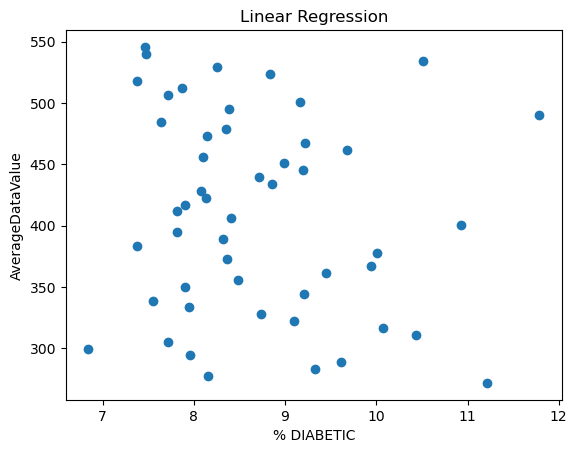

In [65]:
#m, c = learn(x_test, y, m, c, 2000)
def predict():
    y_pred=[(m*i + c) for i in range(len(x_test))]
    return y_pred
y_pred=predict()
y_pred

# Create points for the linear regression line
x1 = np.array([min(x), max(x)])
y1 = m * x1 + c

plt.scatter(x_test, y_pred)
plt.xlabel('% DIABETIC')
plt.ylabel('AverageDataValue')
plt.title('Linear Regression')
plt.show()




In [43]:
#heart 2018 

In [66]:
heart18=pd.read_csv("heart.csv")
heart18=heart18.iloc[:,[1,7]]

In [67]:
for x in range(len(heart18["LocationAbbr"])):
    for y in range(len(short["Code"])):
        if heart18["LocationAbbr"].iloc[x] in short["Code"].iloc[y]:
            heart18["LocationAbbr"].iloc[x]= short["State"].iloc[y]
# Assuming you already have a dataset DataFrame


/var/folders/9g/4k7v0lpn3gzdf7n2fbc4pbn00000gn/T/ipykernel_41159/1394466718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart18["LocationAbbr"].iloc[x]= short["State"].iloc[y]


In [68]:
# Create an empty list to store the individual DataFrames
result_heart = []

# Iterate through unique values in 'LocationAbbr'
for location in heart18['LocationAbbr'].unique():
    # Filter the DataFrame for the current location
    location_data = heart18[heart18['LocationAbbr'] == location]
    
    # Calculate the average of 'Data_Value' for the current location
    avg_data_value = location_data['Data_Value'].mean()
    
    # Create a DataFrame for the current location and average
    location_df = pd.DataFrame({'LocationAbbr': [location], 'AverageDataValue': [avg_data_value]})
    
    # Append the DataFrame to the list
    result_heart.append(location_df)

# Concatenate all the DataFrames in the list
result_heart18 = pd.concat(result_heart, ignore_index=True)

# Print the result_df
result_heart18=result_heart18.rename(columns={"LocationAbbr":"STATE"})

In [69]:
result_heart18.head()

,STATE,AverageDataValue
0,Alaska,290.738793
1,Alabama,435.169535
2,Arkansas,435.567473
3,Arizona,271.979401
4,AS,180.533333


In [70]:
for i in result_heart18['STATE']:
    if len(i)>2:
        continue
    else:
        result_heart18=result_heart18[result_heart18['STATE']!=i]

In [71]:
result_heart18 = result_heart18.reset_index(drop=True)

In [72]:
y_test=result_heart18.iloc[:,1]

In [73]:
y_test.head()

0    290.738793
1    435.169535
2    435.567473
3    271.979401
4    285.790990
Name: AverageDataValue, dtype: float64

In [75]:
type(y_test)
print(type(y_pred))

<class 'list'>


In [ ]:
def predict():
    y_pred=[(m*i + c) for i in range(len(x_test))]
    return y_pred
y_pred=predict()
y_pred

In [86]:
x_test.shape

(50, 1)

In [107]:
# Assuming 'result_df' contains your data with columns 'AverageDataValue' and '% DIABETIC'
#x = result["% DIABETIC"].to_numpy()
#y = result_df["AverageDataValue"].to_numpy()
#y_test = y_test.values

# Initialize random values for m and c
m, c = np.random.random(), np.random.random()

def learn(x_test, y_test, m, c, epoch):
    for i in range(epoch):
        y_pred = m * x_test + c
        error = y_test - y_pred
        
        # Calculate gradients
        delta_m = (-2/len(x_test)) * np.sum(x_test * error)
        delta_c = (-2/len(x_test)) * np.sum(error)
        
        # Update m and c
        learning_rate = 0.01
        m -= learning_rate * delta_m
        c -= learning_rate * delta_c
    
    return m, c


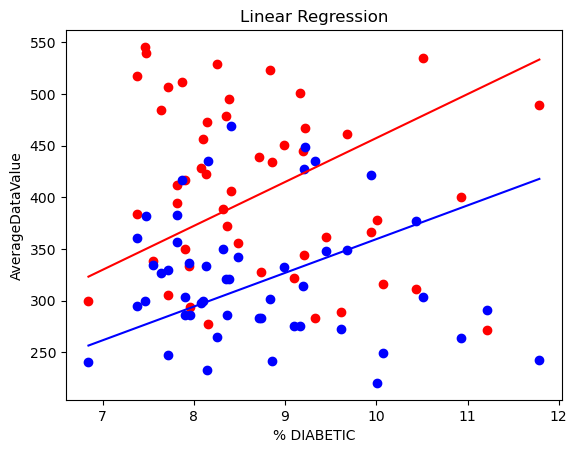

In [112]:
plt.scatter(x_test, y_pred, color="red")
plt.scatter(x_test, y_test, color="blue")

#regression line for predicted data
# Call the learn function to update m and c
m, c = learn(x_test, y_pred, m, c, 20)

# Create points for the linear regression line
x1 = np.array([min(x_test), max(x_test)])
y1 = m * x1 + c

plt.plot(x1, y1, color='red')
# Call the learn function to update m and c
m, c = learn(x_test.squeeze(), y_test, m, c, 20)

# Create points for the linear regression line
x2 = np.array([min(x_test), max(x_test)])
y2 = m * x1 + c
plt.plot(x2, y2, color='blue')

plt.xlabel('% DIABETIC')
plt.ylabel('AverageDataValue')
plt.title('Linear Regression')
plt.show()
